<br></br>
# **gensim | word2vec**
<br></br>
## **1 데이터 전처리**

In [1]:
import glob
from txtutil import txtnoun
# 2015 ~ 2018 지속가능 경영 보고서 Token을 수집
filelist = glob.glob('../data/kr-Report_201?.txt')
print(filelist)

# 불러온 Document 명사Token만 추출
skiplist = {'갤러시':'갤럭시', '가치창출':'가치창출'}
texts    = [txtnoun(file, skip=skiplist)  for file in filelist]
texts    = " ".join(texts)
texts[:300]

['../data/kr-Report_2016.txt', '../data/kr-Report_2017.txt', '../data/kr-Report_2015.txt', '../data/kr-Report_2018.txt']


'삼성전자\n 지속가능경영보고서\n 삼성전자 지속가능경영보고서\n 삼성전자 지속가능경영 사람과 사회 환경 조화롭\n 공존 발전\n 가치 컬러 그래픽 조화롭 구성 심플 톤앤매너\n 표지 전달 또한 인재 기술 바탕 최고 제품\n 서비스 창출하 인류사회 공헌 경영이념 전개 사람 사회\n 환경 포괄 영역 삼성전자 활동 세분 라인 조합\n 완성 형태 움직임 통해 표현\n 보고서 작성 개요\n 삼성전자 경제 가치 환경 보호 사회 발전 지속가능경영 통해 세상 긍정\n 가치 제공 지속가능경영 활동 성과 공개 바탕\n 이해관계자 소통 위해 아홉 지속가능경영보고서 발간\n 보'

In [2]:
# 명사 Token 작업된 자료를 ssResport.txt 로 저장 
texts_file = '../data/ssResport.txt'
with open(texts_file, 'w', encoding='utf-8') as file:
    file.write(texts)

In [3]:
# ! cat ./data/ssResport.txt | head -n 10

<br></br>
## **2 Word 2 vec 객체 만들기**
gensim

In [4]:
# ! pip3 install gensim

In [5]:
%%time
texts_file = '../data/ssResport.txt'

from gensim.models import word2vec
data  = word2vec.LineSentence(texts_file)
model = word2vec.Word2Vec(data, size=200, window=2, min_count=20, hs=1,
                          workers=4, iter=100, sg=1)
model.save("../data/ssReport.model")
print("model saved.")

model saved.
CPU times: user 1min 19s, sys: 749 ms, total: 1min 19s
Wall time: 32.3 s


<br></br>
## **3 저장된 객체 활용**
gensim

In [6]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [7]:
%who

Interactive namespace is empty.


In [8]:
from gensim.models import word2vec
model = word2vec.Word2Vec.load('../data/ssReport.model')
len(model.wv.vocab.keys())

927

In [9]:
list(model.wv.index2word)[:10]

['삼성전자', '관리', '제품', '협력사', '임직원', '사업', '위해', '통해', '글로벌', '교육']

In [10]:
model.wv.most_similar(positive=['삼성전자'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('생각', 0.2546592652797699),
 ('제조', 0.22521910071372986),
 ('인사말', 0.2224113941192627),
 ('지구', 0.22195805609226227),
 ('전담조직', 0.211161807179451),
 ('가장', 0.2056487500667572),
 ('성장', 0.2023772895336151),
 ('스스로', 0.19887249171733856),
 ('스타트업', 0.19723141193389893),
 ('노력', 0.19586186110973358)]

In [11]:
model.wv.most_similar(negative=['삼성전자'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('각주', 0.10347022861242294),
 ('주기', 0.09186889231204987),
 ('완료', 0.08225712180137634),
 ('예정', 0.08068017661571503),
 ('기타', 0.057173024863004684),
 ('케냐', 0.04238442704081535),
 ('에어컨', 0.040793925523757935),
 ('적극', 0.03802839294075966),
 ('변화', 0.03759170323610306),
 ('훈련', 0.03625089302659035)]

In [12]:
model.wv.most_similar(positive=['글로벌'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('책임경영', 0.2668074667453766),
 ('기업시민', 0.2409428507089615),
 ('생산거점', 0.2276557981967926),
 ('전문조직', 0.22614848613739014),
 ('인재경영', 0.22412163019180298),
 ('정도경영', 0.22231942415237427),
 ('법인', 0.22023336589336395),
 ('매출액', 0.2185959368944168),
 ('해외', 0.2185892015695572),
 ('국가별', 0.2148313820362091)]

In [13]:
model.wv.most_similar(negative=['글로벌'])

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('각주', 0.08886698633432388),
 ('선택', 0.08736976981163025),
 ('설비', 0.07159534096717834),
 ('준수', 0.06772229075431824),
 ('배터리', 0.06750676780939102),
 ('전달', 0.06239762529730797),
 ('위반', 0.060864850878715515),
 ('검사', 0.056238118559122086),
 ('개사', 0.05387230962514877),
 ('가족', 0.052691079676151276)]

In [14]:
model.wv.most_similar(positive=['삼성전자','경영활동'], 
                      negative=['근무환경']) # 담당자, 직원

/home/markbaum/Python/nltk/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('가치창출', 0.2803115248680115),
 ('기업', 0.26225581765174866),
 ('사업활동', 0.261832058429718),
 ('인식', 0.24657797813415527),
 ('생각', 0.23894557356834412),
 ('기업시민', 0.23124957084655762),
 ('협의체', 0.22006073594093323),
 ('측면', 0.2161359190940857),
 ('정량성과표', 0.21145324409008026),
 ('폐기', 0.20632822811603546)]

<br></br>
## **04 Visulaization**
gensim

In [15]:
list(model.wv.vocab.keys())[:10]

['삼성전자', '지속가능경영보고서', '지속가능경영', '사회', '환경', '발전', '가치', '구성', '전달', '또한']

In [16]:
# model.wv.vocab : { word: object of numeric vector }
vocab  = list(model.wv.vocab)
X      = model[vocab]
X.shape

/home/markbaum/Python/nltk/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(927, 200)

In [17]:
%%time
from sklearn.manifold import TSNE
tsne   = TSNE(n_components= 2)
X_tsne = tsne.fit_transform(X)

CPU times: user 17.4 s, sys: 1.34 s, total: 18.7 s
Wall time: 18.5 s


In [18]:
import pandas as pd
df = pd.DataFrame(X_tsne, 
                  index = vocab, 
                  columns=['x', 'y'])
df.head()

,x,y
삼성전자,2.595189,2.475562
지속가능경영보고서,0.375126,67.879570
지속가능경영,22.494762,39.360992
사회,0.464887,6.196083
환경,-5.406484,0.462887


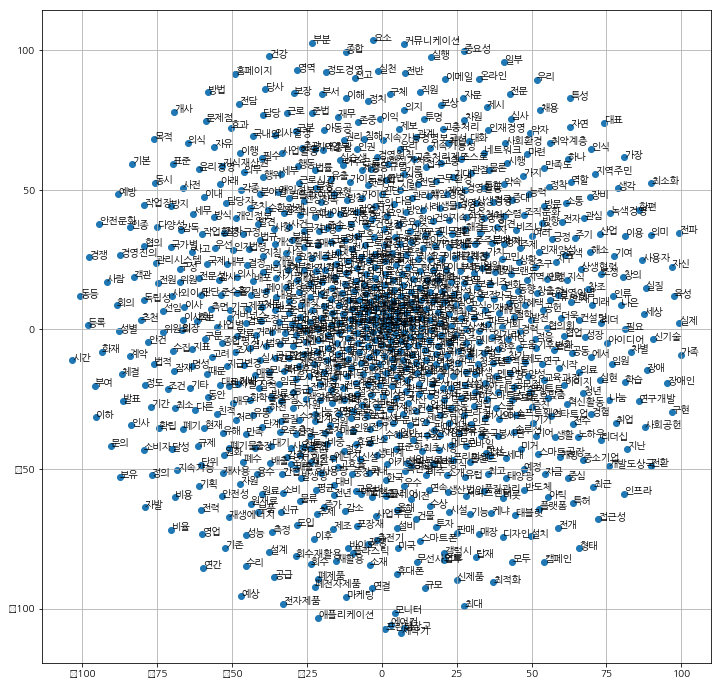

In [19]:
%matplotlib inline
from matplotlib import rc
rc('font', family=['NanumGothic','Malgun Gothic'])

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(1, 1, 1)
ax.scatter(df['x'], df['y'])
for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.grid(True)